In [42]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

In [43]:
dataset = pd.read_csv("Cars_dataset.csv")
dataset

,car_maker,year,kilometers,price
0,Toyota,2019,14999.5,58375.0
1,Kia,2006,0.0,10000.0
2,Toyota,2014,24999.5,58375.0
3,Ford,2010,200000.0,22425.4
4,Ford,2018,5000.0,22425.4
...,...,...,...,...
555,Dodge,2012,200000.0,35000.0
556,Kia,2015,44999.5,10000.0
557,BMW,2014,114999.5,100000.0
558,Suzuki,2013,14999.5,24000.0


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   car_maker   560 non-null    object 
 1   year        560 non-null    int64  
 2   kilometers  560 non-null    float64
 3   price       560 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 17.6+ KB


In [45]:
np.sum(dataset.isna())

car_maker     0
year          0
kilometers    0
price         0
dtype: int64

In [46]:
dataset.describe()

,year,kilometers,price
count,560.000000,560.000000,560.000000
mean,2011.857143,120535.482143,37521.064286
std,3.892236,81305.837563,27022.610673
min,2006.000000,0.000000,2114.000000
25%,2008.000000,39999.500000,19000.000000
50%,2012.500000,149999.500000,27500.000000
75%,2014.250000,200000.000000,58375.000000
max,2019.000000,200000.000000,100000.000000


In [47]:
dataset.corr()

,year,kilometers,price
year,1.000000,-0.583133,0.255938
kilometers,-0.583133,1.000000,-0.077572
price,0.255938,-0.077572,1.000000


In [48]:
np.sum(dataset.duplicated())

533

In [49]:
dataset.year.value_counts()

2008    100
2014     80
2016     60
2013     60
2007     60
2019     40
2009     40
2006     20
2010     20
2018     20
2011     20
2012     20
2015     20
Name: year, dtype: int64

In [50]:
high_frequency_year = [2008,2014,2016,2013,2007]

In [51]:
dataset['year']= [x if x in high_frequency_year else 'Other_year' for x in dataset['year']]
dataset

,car_maker,year,kilometers,price
0,Toyota,Other_year,14999.5,58375.0
1,Kia,Other_year,0.0,10000.0
2,Toyota,2014,24999.5,58375.0
3,Ford,Other_year,200000.0,22425.4
4,Ford,Other_year,5000.0,22425.4
...,...,...,...,...
555,Dodge,Other_year,200000.0,35000.0
556,Kia,Other_year,44999.5,10000.0
557,BMW,2014,114999.5,100000.0
558,Suzuki,2013,14999.5,24000.0


In [52]:
dataset.car_maker.value_counts()

Toyota      140
Ford        120
BMW          80
Kia          60
Renault      40
Nissan       20
Cadillac     20
Mazda        20
GMC          20
Dodge        20
Suzuki       20
Name: car_maker, dtype: int64

In [53]:
high_frequency_car_makers = ['Toyota','Ford','BMW']

In [54]:
dataset['car_maker']= [x if x in high_frequency_car_makers else 'Other_makers' for x in dataset['car_maker']]
dataset

,car_maker,year,kilometers,price
0,Toyota,Other_year,14999.5,58375.0
1,Other_makers,Other_year,0.0,10000.0
2,Toyota,2014,24999.5,58375.0
3,Ford,Other_year,200000.0,22425.4
4,Ford,Other_year,5000.0,22425.4
...,...,...,...,...
555,Other_makers,Other_year,200000.0,35000.0
556,Other_makers,Other_year,44999.5,10000.0
557,BMW,2014,114999.5,100000.0
558,Other_makers,2013,14999.5,24000.0


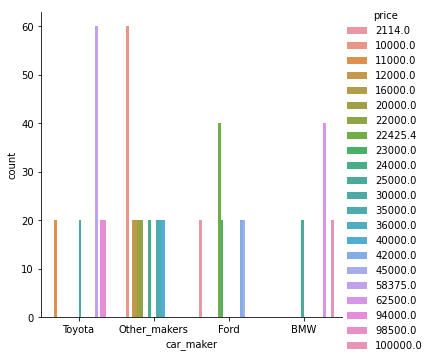

In [55]:
sns.catplot(x = "car_maker", hue = "price", data = dataset, kind = "count")

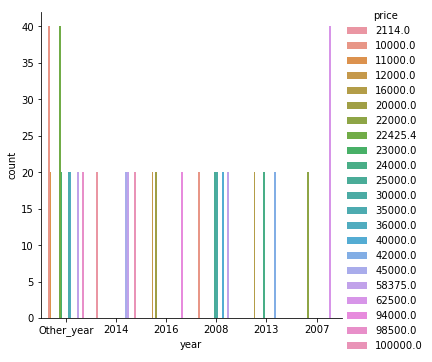

In [56]:
sns.catplot(x = "year", hue = "price", data = dataset, kind = "count")

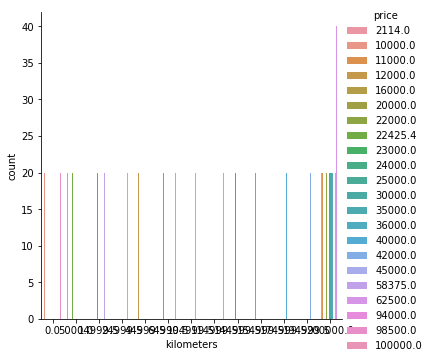

In [57]:
sns.catplot(x = "kilometers", hue = "price", data = dataset, kind = "count")

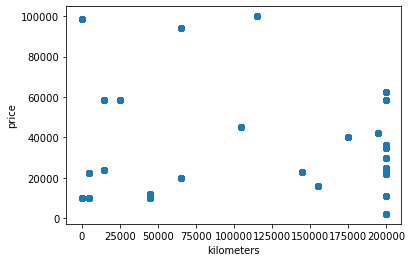

In [58]:
plt.scatter(dataset['kilometers'],dataset['price'])
plt.xlabel('kilometers', fontsize = 10)
plt.ylabel('price', fontsize = 10)
plt.show()

In [59]:
largest_kilometer = dataset['kilometers'].max()

In [60]:
dataset['kilometers'] = [(x/largest_kilometer) for x in dataset['kilometers']]

In [61]:
dataset

,car_maker,year,kilometers,price
0,Toyota,Other_year,0.074997,58375.0
1,Other_makers,Other_year,0.000000,10000.0
2,Toyota,2014,0.124997,58375.0
3,Ford,Other_year,1.000000,22425.4
4,Ford,Other_year,0.025000,22425.4
...,...,...,...,...
555,Other_makers,Other_year,1.000000,35000.0
556,Other_makers,Other_year,0.224997,10000.0
557,BMW,2014,0.574998,100000.0
558,Other_makers,2013,0.074997,24000.0


In [62]:
dataset.describe()

,kilometers,price
count,560.000000,560.000000
mean,0.602677,37521.064286
std,0.406529,27022.610673
min,0.000000,2114.000000
25%,0.199997,19000.000000
50%,0.749997,27500.000000
75%,1.000000,58375.000000
max,1.000000,100000.000000


In [63]:
def plot_histogram(dataFrame,column):
    plt.hist(x=dataFrame[column],color='blue',alpha=0.45)
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.show()

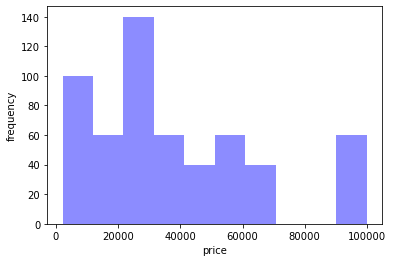

In [64]:
plot_histogram(dataset,'price')

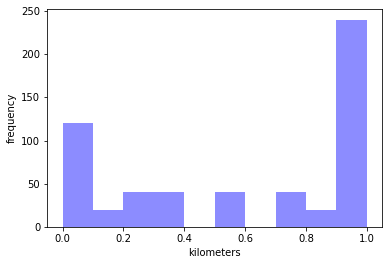

In [65]:
plot_histogram(dataset,'kilometers')

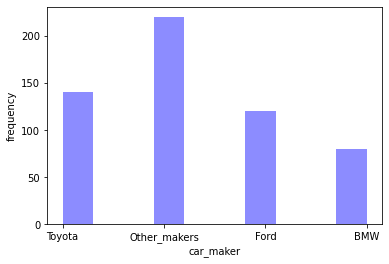

In [66]:
plot_histogram(dataset,'car_maker')

In [67]:
def find_outliers(dataFrame,column):
    Q1= np.percentile(dataFrame[column],25)
    Q3= np.percentile(dataFrame[column],75)
    IQR = Q3-Q1
    floor = Q1 - 1.5*IQR
    ceiling =Q3 +1.5*IQR
    ctr = 0
    outliers=[]
    for observation in dataFrame[column]:
        if observation < floor or observation> ceiling :
            outliers.append(observation)
            ctr+=1
    return floor,ceiling, ctr,outliers

In [68]:
floor,ceiling, ctr,outliers = find_outliers(dataset,'price')
print("lower boundary of price", floor)
print("upper boundary of price",ceiling)
print("number of outliers",ctr)
print("outliers value",outliers)

lower boundary of price -40062.5
upper boundary of price 117437.5
number of outliers 0
outliers value []


In [69]:
floor,ceiling, ctr,outliers = find_outliers(dataset,'kilometers')
print("lower boundary of kilometers", floor)
print("upper boundary of kilometers",ceiling)
print("number of outliers",ctr)
print("outliers value",outliers)

lower boundary of kilometers -1.00000625
upper boundary of kilometers 2.20000375
number of outliers 0
outliers value []


In [70]:
dataset

,car_maker,year,kilometers,price
0,Toyota,Other_year,0.074997,58375.0
1,Other_makers,Other_year,0.000000,10000.0
2,Toyota,2014,0.124997,58375.0
3,Ford,Other_year,1.000000,22425.4
4,Ford,Other_year,0.025000,22425.4
...,...,...,...,...
555,Other_makers,Other_year,1.000000,35000.0
556,Other_makers,Other_year,0.224997,10000.0
557,BMW,2014,0.574998,100000.0
558,Other_makers,2013,0.074997,24000.0


In [71]:
toDummyColumns=['car_maker','year']
for column in toDummyColumns:
    sparse_columns = pd.get_dummies(dataset[column])
    dataset = dataset.drop(column,axis= 1)
    dataset = pd.concat([dataset,sparse_columns],1)

In [72]:
dataset = dataset.sample(frac=1,random_state = 26)

In [73]:
dataset

,kilometers,price,BMW,Ford,Other_makers,Toyota,2007,2008,2013,2014,2016,Other_year
66,1.000000,25000.0,1,0,0,0,0,1,0,0,0,0
116,0.025000,22425.4,0,1,0,0,0,0,0,0,0,1
35,0.524998,45000.0,0,1,0,0,0,0,0,1,0,0
391,0.324997,94000.0,0,0,0,1,0,0,0,0,1,0
42,1.000000,30000.0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
160,1.000000,62500.0,1,0,0,0,1,0,0,0,0,0
77,0.224997,12000.0,0,0,1,0,0,0,0,0,1,0
102,1.000000,62500.0,1,0,0,0,1,0,0,0,0,0
432,0.724997,23000.0,0,1,0,0,0,0,0,0,0,1


In [74]:
x = dataset.drop('price',1)
x

,kilometers,BMW,Ford,Other_makers,Toyota,2007,2008,2013,2014,2016,Other_year
66,1.000000,1,0,0,0,0,1,0,0,0,0
116,0.025000,0,1,0,0,0,0,0,0,0,1
35,0.524998,0,1,0,0,0,0,0,1,0,0
391,0.324997,0,0,0,1,0,0,0,0,1,0
42,1.000000,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
160,1.000000,1,0,0,0,1,0,0,0,0,0
77,0.224997,0,0,1,0,0,0,0,0,1,0
102,1.000000,1,0,0,0,1,0,0,0,0,0
432,0.724997,0,1,0,0,0,0,0,0,0,1


In [75]:
y = dataset['price']
y

66     25000.0
116    22425.4
35     45000.0
391    94000.0
42     30000.0
        ...   
160    62500.0
77     12000.0
102    62500.0
432    23000.0
318    25000.0
Name: price, Length: 560, dtype: float64

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 404)

In [77]:
degrees= []
training_error=[]
testing_error = []

In [78]:
def model_trial(X_train, X_test, y_train, y_test,complexity):
    degrees.append(complexity)
    model = Lasso()
    polynomial_features = PolynomialFeatures(degree=complexity)
    expanded_features = polynomial_features.fit_transform(X_train)
    model.fit(expanded_features, y_train)
    trainPrediction = model.predict(expanded_features)
    testPrediction = model.predict(polynomial_features.fit_transform(X_test))

    trainError = metrics.mean_squared_error(y_train, trainPrediction)
    testError = metrics.mean_squared_error(y_test, testPrediction)
    training_error.append(trainError)
    testing_error.append(testError)
    print('Train subset (MSE) for degree {}: '.format(complexity), trainError)
    print('Test subset (MSE) for degree {}: '.format(complexity), testError)

In [79]:
model_trial(x_train,x_test,y_train,y_test,4)

Train subset (MSE) for degree 4:  15795820.313419173
Test subset (MSE) for degree 4:  9169801.024104634


In [80]:
model_trial(x_train,x_test,y_train,y_test,5)

Train subset (MSE) for degree 5:  15778616.86508815
Test subset (MSE) for degree 5:  9152319.710070118


In [81]:
model_trial(x_train,x_test,y_train,y_test,6)

Train subset (MSE) for degree 6:  15777254.171033174
Test subset (MSE) for degree 6:  9148367.375879942


In [82]:
model_trial(x_train,x_test,y_train,y_test,7)

Train subset (MSE) for degree 7:  15778518.080518125
Test subset (MSE) for degree 7:  9149342.347083485


In [83]:
model_trial(x_train,x_test,y_train,y_test,8)

Train subset (MSE) for degree 8:  15777150.580801949
Test subset (MSE) for degree 8:  9148269.463402985


In [84]:
model_trial(x_train,x_test,y_train,y_test,9)

Train subset (MSE) for degree 9:  15775149.652187526
Test subset (MSE) for degree 9:  9148716.562393652


In [85]:
model_trial(x_train,x_test,y_train,y_test,10)

Train subset (MSE) for degree 10:  15775879.821383363
Test subset (MSE) for degree 10:  9149796.663274124


In [86]:
model_trial(x_train,x_test,y_train,y_test,11)

Train subset (MSE) for degree 11:  15775349.51085037
Test subset (MSE) for degree 11:  9149231.627457952


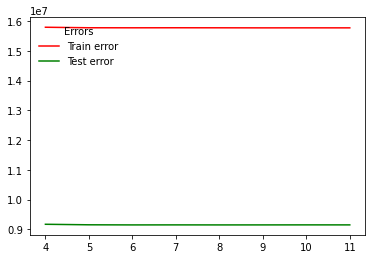

In [87]:
plt.plot(degrees,training_error,color = 'red',label = 'Train error')
plt.plot(degrees,testing_error,color = 'green',label = 'Test error')
plt.legend(loc="upper left", title="Errors",frameon = False)
plt.show()

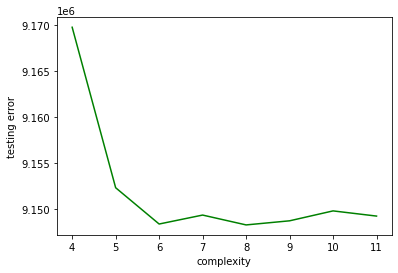

In [88]:
plt.plot(degrees,testing_error,color = 'green',label = 'Test error')
plt.xlabel('complexity')
plt.ylabel('testing error')
plt.show()

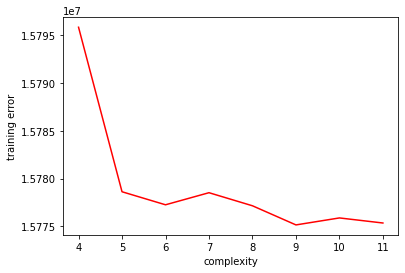

In [89]:
plt.plot(degrees,training_error,color = 'red',label = 'Train error')
plt.xlabel('complexity')
plt.ylabel('training error')
plt.show()